In [167]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.datasets as datasets
import sklearn.model_selection as skms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as skpre
from sklearn import linear_model
import textwrap

!pip install scikit-learn

In [168]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [169]:
docs = ["the cat in the hat",
       'the cow jumped over the moon',
       'the cat mooed and the cow meowed',
       'the cat said to the cow cow you are not a cat']

In [170]:
vocabulary = set(' '.join(docs).split())

In [171]:
common_words = set(['a', 'to', 'the', 'in', 'and', 'are'])
vocabulary = vocabulary - common_words
print(textwrap.fill(str(vocabulary)))

{'said', 'jumped', 'you', 'cat', 'over', 'not', 'mooed', 'hat', 'cow',
'moon', 'meowed'}


In [172]:
doc_contains = [{w:(w in d) for w in vocabulary} for d in docs]
display(pd.DataFrame(doc_contains))

,said,jumped,you,cat,over,not,mooed,hat,cow,moon,meowed
0,False,False,False,True,False,False,False,True,False,False,False
1,False,True,False,False,True,False,False,False,True,True,False
2,False,False,False,True,False,False,True,False,True,False,True
3,True,False,True,True,False,True,False,False,True,False,False


In [173]:
word_count = [{w:d.count(w) for w in vocabulary} for d in docs]
wcs = pd.DataFrame(word_count)
display(wcs)

,said,jumped,you,cat,over,not,mooed,hat,cow,moon,meowed
0,0,0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0,1,1,0
2,0,0,0,1,0,0,1,0,1,0,1
3,1,0,1,2,0,1,0,0,2,0,0


In [174]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

sparse_matrix = vectorizer.fit_transform(docs)

dense_matrix = sparse_matrix.todense()

print(dense_matrix)

[[1 0 1 0 0 0 0 0]
 [0 1 0 1 0 0 1 0]
 [1 1 0 0 1 1 0 0]
 [2 2 0 0 0 0 0 1]]


In [175]:
doc_freq = pd.DataFrame(wcs.astype(np.bool).sum(axis='rows')).T
display(doc_freq)

/var/folders/62/wk7d6m657c77jqhkywh7b8140000gn/T/ipykernel_66859/1509906009.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  doc_freq = pd.DataFrame(wcs.astype(np.bool).sum(axis='rows')).T


,said,jumped,you,cat,over,not,mooed,hat,cow,moon,meowed
0,1,1,1,3,1,1,1,1,3,1,1


In [176]:
idf = np.log(len(docs) / doc_freq)
display(idf)

,said,jumped,you,cat,over,not,mooed,hat,cow,moon,meowed
0,1.386294,1.386294,1.386294,0.287682,1.386294,1.386294,1.386294,1.386294,0.287682,1.386294,1.386294


In [177]:
tf_idf = wcs * idf.iloc[0]
display(tf_idf)

,said,jumped,you,cat,over,not,mooed,hat,cow,moon,meowed
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,0.000000
1,0.000000,1.386294,0.000000,0.000000,1.386294,0.000000,0.000000,0.000000,0.287682,1.386294,0.000000
2,0.000000,0.000000,0.000000,0.287682,0.000000,0.000000,1.386294,0.000000,0.287682,0.000000,1.386294
3,1.386294,0.000000,1.386294,0.575364,0.000000,1.386294,0.000000,0.000000,0.575364,0.000000,0.000000


In [178]:
skpre.Normalizer(norm='l1').fit_transform(wcs)

array([[0.        , 0.        , 0.        , 0.5       , 0.        ,
        0.        , 0.        , 0.5       , 0.        , 0.        ,
        0.        ],
       [0.        , 0.25      , 0.        , 0.        , 0.25      ,
        0.        , 0.        , 0.        , 0.25      , 0.25      ,
        0.        ],
       [0.        , 0.        , 0.        , 0.25      , 0.        ,
        0.        , 0.25      , 0.        , 0.25      , 0.        ,
        0.25      ],
       [0.14285714, 0.        , 0.14285714, 0.28571429, 0.        ,
        0.14285714, 0.        , 0.        , 0.28571429, 0.        ,
        0.        ]])

In [179]:
sparse_matrix = vectorizer.fit_transform(docs)
dense_matrix = sparse_matrix.todense()

print(dense_matrix)

[[1 0 1 0 0 0 0 0]
 [0 1 0 1 0 0 1 0]
 [1 1 0 0 1 1 0 0]
 [2 2 0 0 0 0 0 1]]


In [180]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train')

In [181]:
print('the groups:')
print(textwrap.fill(str(twenty_train.target_names)))

the groups:
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x',
'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball',
'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med',
'sci.space', 'soc.religion.christian', 'talk.politics.guns',
'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [182]:
print('\n'.join(twenty_train.data[0].splitlines()[:10]))

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 


In [183]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

ct_vect = CountVectorizer()
tfidf_xform = TfidfTransformer()

docs_as_counts = ct_vect.fit_transform(twenty_train.data)
docs_as_tfidf = tfidf_xform.fit_transform(docs_as_counts)

In [184]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

ct_vect = CountVectorizer()
tfidf_xform = TfidfTransformer()

docs_as_counts = ct_vect.fit_transform(twenty_train.data)
docs_as_tfidf = tfidf_xform.fit_transform(docs_as_counts)

model = MultinomialNB().fit(docs_as_tfidf, twenty_train.target)

In [185]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

doc_pipeline = make_pipeline(
    CountVectorizer(),
    TfidfTransformer(),
    MultinomialNB()
)

In [186]:
categories = ['misc.forsale',
             'comp.graphics',
             'sci.med',
             'sci.space']

In [187]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

twenty_train = fetch_20newsgroups(subset='train',
                                  categories=categories,
                                  shuffle=True,
                                  random_state=42)

doc_pipeline = make_pipeline(
    TfidfVectorizer(),
    MultinomialNB()
)

model = doc_pipeline.fit(twenty_train.data, twenty_train.target)

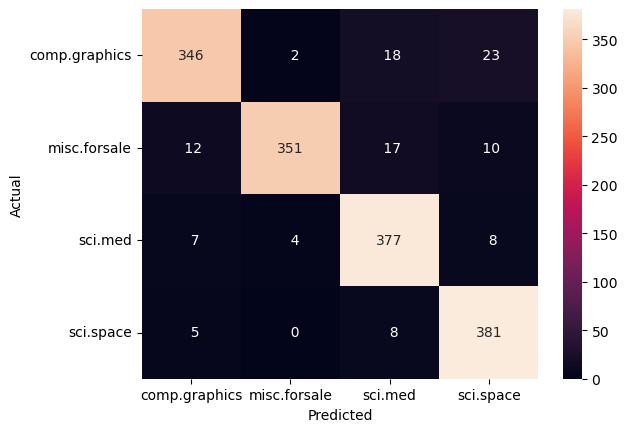

In [188]:
from sklearn import metrics
twenty_test = fetch_20newsgroups(subset='test',
                                 categories=categories,
                                 shuffle=True,
                                 random_state=42)

doc_preds = model.predict(twenty_test.data)
cm = metrics.confusion_matrix(twenty_test.target, doc_preds)
ax = sns.heatmap(cm, annot=True,
                 xticklabels=twenty_test.target_names,
                 yticklabels=twenty_test.target_names,
                 fmt='3d')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

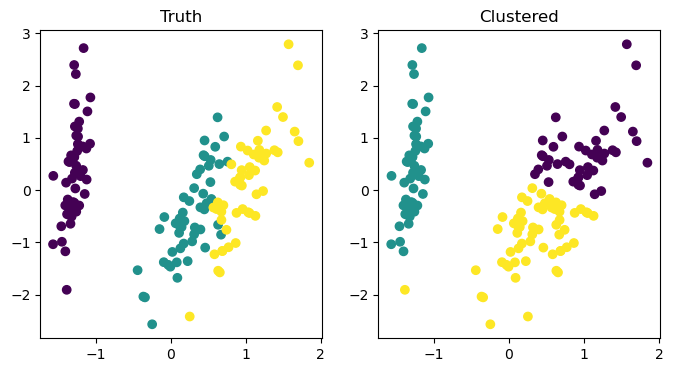

In [189]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = datasets.load_iris()
twod_iris = PCA(n_components=2, whiten=True).fit_transform(iris.data)
clusters = KMeans(n_clusters=3).fit(twod_iris)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].scatter(*twod_iris.T, c=iris.target)
axes[1].scatter(*twod_iris.T, c=clusters.labels_)

axes[0].set_title("Truth")
axes[1].set_title("Clustered")

plt.show()

In [190]:
import glob
import os.path as osp
import textwrap

objcat_path = "./data/101_ObjectCategories"
cat_paths = glob.glob(osp.join(objcat_path, "*"))
all_categories = [d.split('/')[-1] for d in cat_paths]

print("number of categories:", len(all_categories))
print("first 10 categories:\n",
     textwrap.fill(str(all_categories[:10])))

number of categories: 0
first 10 categories:
 []


In [191]:
import itertools as it

use_cats = ['accordian', 'airplanes', 'anchor']
use_imgs = range(1, 11)

img_ids = list(it.product(use_cats, use_imgs))
num_imgs = len(img_ids)
global_vocab_size = 20

In [192]:
import itertools as it

def add_local_words_for_img(local_words_dict, img_id):
    
    local_words_dict[img_id] = ["word1", "word2"]

use_cats = ['accordian', 'airplanes', 'anchor']
use_imgs = range(1, 11)

img_ids = list(it.product(use_cats, use_imgs))
num_imgs = len(img_ids)
global_vocab_size = 20

local_words = {}
for img_id in img_ids:
    add_local_words_for_img(local_words, img_id)

print(local_words.keys())

dict_keys([('accordian', 1), ('accordian', 2), ('accordian', 3), ('accordian', 4), ('accordian', 5), ('accordian', 6), ('accordian', 7), ('accordian', 8), ('accordian', 9), ('accordian', 10), ('airplanes', 1), ('airplanes', 2), ('airplanes', 3), ('airplanes', 4), ('airplanes', 5), ('airplanes', 6), ('airplanes', 7), ('airplanes', 8), ('airplanes', 9), ('airplanes', 10), ('anchor', 1), ('anchor', 2), ('anchor', 3), ('anchor', 4), ('anchor', 5), ('anchor', 6), ('anchor', 7), ('anchor', 8), ('anchor', 9), ('anchor', 10)])


In [193]:
import itertools as it
import textwrap

itcfi = it.chain.from_iterable
img_local_word_cts = [len(local_words[img_id]) for img_id in img_ids]
print("Number of local words for images:")
print(textwrap.fill(str(img_local_word_cts), width=50))

Number of local words for images:
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [194]:
import numpy as np
import itertools as it

local_words = {}
for cat in use_cats:
    local_words[cat] = {}
    for img_id in use_imgs:
        num_local_words = np.random.randint(5, 15)  
        local_words[cat][img_id] = np.random.rand(num_local_words, 3)  

all_local_words = list(it.chain.from_iterable(local_words[cat].values() for cat in use_cats))

tot_num_local_words = sum(lw.shape[0] for lw in all_local_words)
num_local_words = all_local_words[0].shape[1]

local_word_arr = np.vstack(all_local_words)

print('local word tbl:', local_word_arr.shape)

local word tbl: (273, 3)


In [195]:
global_vocab_size = 20
translator = KMeans(n_clusters=global_vocab_size)  
global_words = translator.fit_predict(local_word_arr)
print('translated words shape:', global_words.shape)

translated words shape: (273,)


In [196]:
from collections import Counter 
which_img = []
for img_id in use_imgs:
    which_img.extend([img_id] * len(local_words[use_cats[0]][img_id]))  

counts = Counter(zip(which_img, global_words))

imgs_as_bogvw = np.zeros((len(use_imgs), global_vocab_size))
for (img, global_word), count in counts.items():
    imgs_as_bogvw[img - 1, global_word] = count  

print('shape hist table:', imgs_as_bogvw.shape)

shape hist table: (10, 20)


In [197]:
img_tgts = []
for cat_id, cat in enumerate(use_cats):
    for img_id in use_imgs:
        img_tgts.extend([cat_id] * len(local_words[cat][img_id]))

print('img tgt values:', img_tgts[:10])

img tgt values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [198]:
from sklearn.svm import SVC 
img_tgts = []
for cat_id, cat in enumerate(use_cats):
    for _ in use_imgs:  
        img_tgts.append(cat_id)

In [199]:
class BoVW_XForm:
    def __init__(self):
        pass
    
    def add_local_words_for_img(self, local_words, img_id):
        # Implement this function to add local words for an image
        pass
    
    def _to_local_words(self, img_ids):
        local_words = {}
        for img_id in img_ids:
            self.add_local_words_for_img(local_words, img_id)
            
        itcfi = it.chain.from_iterable
        all_local_words = list(itcfi(local_words.values()))
        return all_local_words
    
    def fit(self, img_ids, tgt=None, global_vocab_size=10, num_local_words=100):
        all_local_words = self._to_local_words(img_ids)
        tot_num_local_words = sum(lw.shape[0] for lw in all_local_words)
        local_word_arr = np.fromiter(it.chain.from_iterable(all_local_words),
                                     dtype=np.float32,
                                     count=tot_num_local_words * num_local_words).reshape(tot_num_local_words, num_local_words)
        
        self.translator = cluster.KMeans(n_clusters=global_vocab_size)
        self.translator.fit(local_word_arr)
        return self
    
    def transform(self, img_ids, tgt=None, global_vocab_size=10, num_local_words=100):
        all_local_words = self._to_local_words(img_ids)
        tot_num_local_words = sum(lw.shape[0] for lw in all_local_words)
        local_word_arr = np.fromiter(it.chain.from_iterable(all_local_words),
                                     dtype=np.float32,
                                     count=tot_num_local_words * num_local_words).reshape(tot_num_local_words, num_local_words)
        global_words = self.translator.predict(local_word_arr)
        
        # Define the missing function 'enumerate_outer'
        def enumerate_outer(seq):
            for i, subseq in enumerate(seq):
                for item in subseq:
                    yield i, item
        
        counts = co.Counter(zip(enumerate_outer(all_local_words), global_words))
        imgs_as_bowv = np.zeros((len(img_ids), global_vocab_size))
        for (img, global_word), count in counts.items():
            imgs_as_bowv[img, global_word] = count
        return imgs_as_bowv

In [200]:
use_cats = ['watch', 'umbrella', 'sunflower', 'kangaroo']
use_imgs = range(1,40)

img_ids = list(it.product(use_cats, use_imgs))
num_imgs = len(img_ids)

cat_id = {c:i for i,c in enumerate(use_cats)}
img_tgts = [cat_id[ii[0]] for ii in img_ids]

In [ ]:
from sklearn import cluster, pipeline, svm, preprocessing as skpre, metrics
import sklearn.model_selection as skms
import seaborn as sns
import numpy as np

print("Before train-test split:")
print("img_ids shape:", img_ids.shape)
print("img_tgts shape:", img_tgts.shape)

train_img, test_img, train_tgt, test_tgt = skms.train_test_split(img_ids, img_tgts, test_size=0.2, random_state=42)

print("After train-test split:")
print("train_img shape:", train_img.shape)
print("train_tgt shape:", train_tgt.shape)

bovw_pipe = pipeline.make_pipeline(BoVW_XForm(),
                                   skpre.StandardScaler(),
                                   svm.SVC())

print("Fitting pipeline...")

bovw_pipe.fit(train_img, train_tgt)

print("Pipeline fitting complete.")

In [ ]:
train_img, test_img, train_tgt, test_tgt = skms.train_test_split(img_ids, img_tgts, test_size=0.2, random_state=42)

bovw_pipe = pipeline.make_pipeline(BoVW_XForm(),
                                   skpre.StandardScaler(),
                                   svm.SVC())

bovw_pipe.fit(train_img, train_tgt)

img_preds = bovw_pipe.predict(test_img)

cm = metrics.confusion_matrix(test_tgt, img_preds)

ax = sns.heatmap(cm, annot=True,
                 xticklabels=use_cats,
                 yticklabels=use_cats,
                 fmt='d')  

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')